# Bande acoustiques 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pymatgen.ext.matproj import MPRester
from pymatgen import Structure
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.phonon import plotter
from pymatgen.phonon.plotter import PhononBSPlotter
from pymatgen.phonon.bandstructure import PhononBandStructure

In [3]:
with MPRester ("dSIkoJuHEqTpcGXu8") as m:
    
    #Informations par rapport aux bandes
    band_struct = m.get_phonon_bandstructure_by_material_id("mp-961660")
    
    #Création graphe
    phonon_plot = PhononBSPlotter(band_struct) 

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:455: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:456: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



# 1) Representation bandes

<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

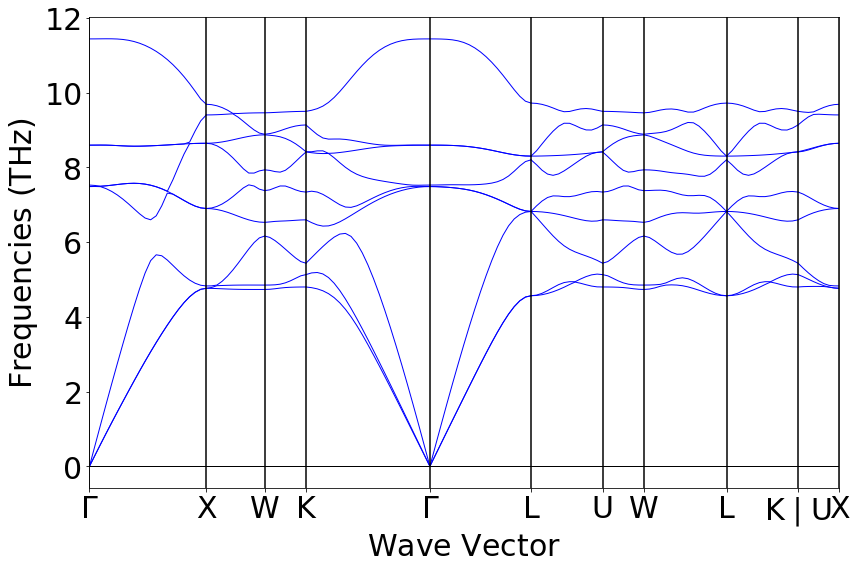

In [4]:
phonon_plot.get_plot()

En analysant le graphe ci-dessus, on remarque qu'il y a 3 directions de propagations, à savoir $\Gamma - X$, $K - \Gamma$ et $\Gamma - L$

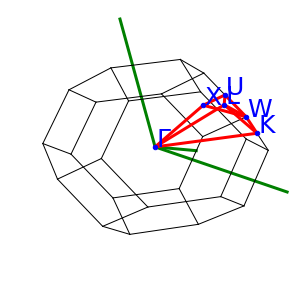

In [5]:
phonon_plot.plot_brillouin()

# 2) Calcul vitesse du son dans trois bande acoustiques différentes dans trois directions différentes

La vitesse du son est définie comme $v_s = \frac{\delta\omega}{\delta q}$, avec $\omega$ qui est le vecteur de dispersion et q est le vectreur d'onde.

In [46]:
data = phonon_plot.bs_plot_data() #récupération des données nécessaires
dists = data.get("distances")
freqs = data.get("frequency") 

## Vitesse du son première bande acoustique : $\Gamma - X$

In [50]:
#Première direction : Γ-X
vs1 = 2*np.pi*np.abs((freqs[0][0][1] - freqs[0][0][0])*(10**2))/((dists[0][1]-dists[0][0]))
print("La vitesse du son selon la direction Γ−X vaut " + str(vs1) + "m/s")
print(str(vs1 * 3.6) + "km/h")

La vitesse du son selon la direction Γ−X vaut 3452.0710573351153m/s
12427.455806406415km/h


## Vitesse du son deuxième bande acoustique: $K - \Gamma$

In [51]:
#Première direction : K-Γ
vs2 = 2*np.pi*np.abs((freqs[3][1][1] - freqs[3][1][0])*(10**2))/((dists[3][1]-dists[3][0]))
print("La vitesse du son selon la direction K-Γ vaut " + str(vs2) + "m/s")
print(str(vs2 * 3.6) + "km/h")

La vitesse du son selon la direction K-Γ vaut 519.8804388631088m/s
1871.5695799071916km/h


## Vitesse du son troisième bande acoustique: $\Gamma - L$

In [53]:
#Première direction : Γ-L
vs3 = 2*np.pi*np.abs((freqs[4][2][1] - freqs[4][2][0])*(10**2))/((dists[4][1]-dists[4][0]))
print("La vitesse du son selon la direction Γ-L vaut " + str(vs3) + "m/s")
print(str(vs3 * 3.6) + "km/h")

La vitesse du son selon la direction Γ-L vaut 6415.523463852649m/s
23095.884469869536km/h
